In [24]:
ls

AESLC/


In [25]:
pip install accelerate -U

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install rouge

Note: you may need to restart the kernel to use updated packages.


In [ ]:
git clone https://github.com/ryanzhumich/AESLC

In [27]:
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset, DataLoader

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
folder_path = 'AESLC/enron_subject_line/train'

In [29]:
import os

In [30]:
with open(os.path.join(folder_path, "allen-p_inbox_20.subject"), 'r', encoding='utf-8') as file:
  content = file.read()
  print(content)

Greg/Phillip,  Attached is the Grande Communications Service Agreement.
The business points can be found in Exhibit C.  I Can get the Non-Disturbance agreement after it has been executed by you and Grande.
I will fill in the Legal description of the property one I have received it.
Please execute and send to:  Grande Communications, 401 Carlson Circle, San Marcos Texas, 78666 Attention Hunter Williams.
<<Bishopscontract.doc>>

@subject
Service Agreement


In [31]:
import re

In [32]:
match = re.search(r'@subject\s+(.*)', content, re.IGNORECASE | re.DOTALL)

In [33]:
if match:
  subject = match.group(1).strip()
  print(subject)
  email_body = re.sub(r'@subject\n(.+)\n', '', content).strip()
  print("\n")
  print(email_body)

Service Agreement


Greg/Phillip,  Attached is the Grande Communications Service Agreement.
The business points can be found in Exhibit C.  I Can get the Non-Disturbance agreement after it has been executed by you and Grande.
I will fill in the Legal description of the property one I have received it.
Please execute and send to:  Grande Communications, 401 Carlson Circle, San Marcos Texas, 78666 Attention Hunter Williams.
<<Bishopscontract.doc>>

@subject
Service Agreement


In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [40]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron

True

In [44]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [45]:
if match:
  subject = match.group(1).strip()
  print(subject)
  email_body = re.sub(r'@subject\n(.+)\n', '', content).strip()
  print("\n")
  print(email_body)
  print("\n")
  preprocessed_email = preprocess_text(email_body)
  print(preprocessed_email)

Service Agreement


Greg/Phillip,  Attached is the Grande Communications Service Agreement.
The business points can be found in Exhibit C.  I Can get the Non-Disturbance agreement after it has been executed by you and Grande.
I will fill in the Legal description of the property one I have received it.
Please execute and send to:  Grande Communications, 401 Carlson Circle, San Marcos Texas, 78666 Attention Hunter Williams.
<<Bishopscontract.doc>>

@subject
Service Agreement


attached grande communication service agreement business point found exhibit get agreement executed grande fill legal description property one received please execute send grande communication 401 carlson circle san marcos texas 78666 attention hunter williams subject service agreement


In [46]:
def sanitize_subject(subject):
    # Remove special characters from the subject
    return re.sub(r'[^a-zA-Z0-9\s]', '', subject)

In [47]:
import os
import re

def load_emails_and_subjects(emails_directory):
    emails = []
    subjects = []

    for filename in os.listdir(emails_directory):
        file_path = os.path.join(emails_directory, filename)

        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            email_text = file.read()

            # Extract subject from email body using regex
            match = re.search(r'@subject\s+(.*)', email_text, re.IGNORECASE | re.DOTALL)

            if match:
                subject = match.group(1).strip()
                email_body = re.sub(r'@subject\n(.+)\n', '', email_text).strip()
                preprocessed_email = preprocess_text(email_body)

                emails.append(preprocessed_email)
                subjects.append(subject)

    return emails, subjects

In [49]:
train_emails, tain_subjects = load_emails_and_subjects('AESLC/enron_subject_line/train')
dev_emails, dev_subjects = load_emails_and_subjects('AESLC/enron_subject_line/dev')
test_emails, test_subjects = load_emails_and_subjects('AESLC/enron_subject_line/test')

In [50]:
import pandas as pd

In [51]:
train_data = pd.DataFrame({'subject_line': tain_subjects, 'email_body': train_emails})
dev_data = pd.DataFrame({'subject_line': dev_subjects, 'email_body': dev_emails})
test_data = pd.DataFrame({'subject_line': test_subjects, 'email_body': test_emails})

In [52]:
train_data.head()

,subject_line,email_body
0,Guaranty,clement sent draft guaranty enron ec compressi...
1,Aug 15 draft of CEC,attaching redline revised version document for...
2,Assignment Issue,would like consider agreement solve problem th...
3,Increasing EOL liquidity in West Basis,would like set brief meeting afternoon week ne...
4,NY Market Training Course,heard quite response earlier email indicating ...


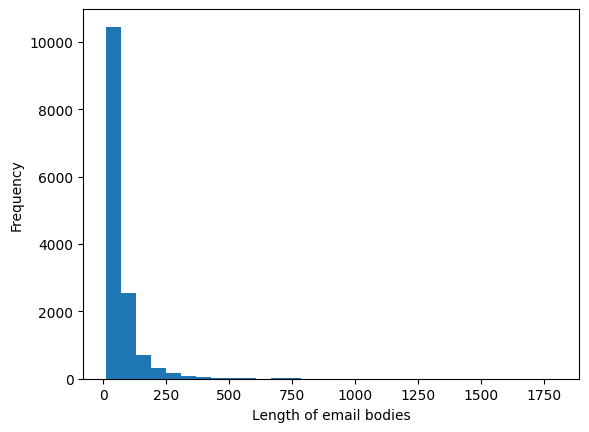

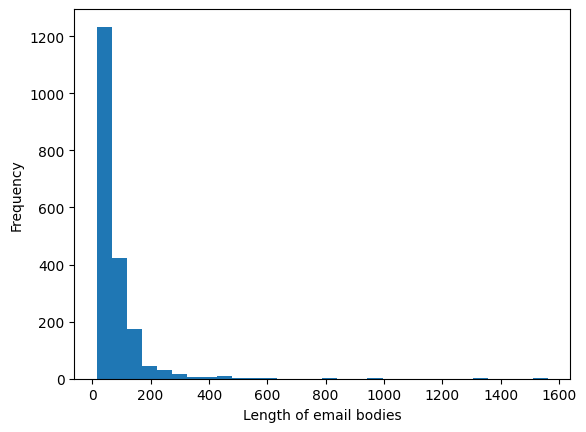

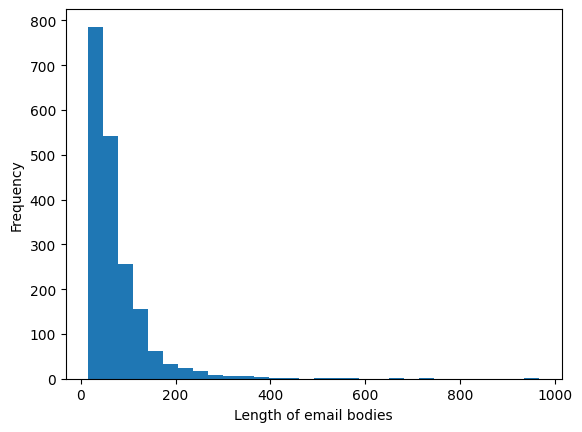

In [53]:
import matplotlib.pyplot as plt

def plot_data(data):
    lengths = [len(text.split()) for text in data['email_body']]
    plt.hist(lengths, bins=30)
    plt.xlabel('Length of email bodies')
    plt.ylabel('Frequency')
    plt.show()

plot_data(train_data)
plot_data(dev_data)
plot_data(test_data)


In [54]:
class EmailSubjectDataset(Dataset):
    def __init__(self, emails, subjects, tokenizer, max_length):
        self.emails = emails
        self.subjects = subjects
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.emails)

    def __getitem__(self, idx):
        email_text = self.emails[idx]
        subject_text = self.subjects[idx]

        # Tokenize inputs and outputs
        inputs = self.tokenizer.encode_plus(email_text, max_length=self.max_length, padding='max_length', return_tensors='pt', truncation=True)
        outputs = self.tokenizer.encode_plus(subject_text, max_length=self.max_length, padding='max_length', return_tensors='pt', truncation=True)

        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'labels': outputs['input_ids'].flatten()
        }

In [55]:
from transformers import Trainer, TrainingArguments, T5Tokenizer, T5ForConditionalGeneration
import torch
from torch.utils.data import Dataset


In [57]:
tokenizer = T5Tokenizer.from_pretrained('t5-small', legacy=False)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [58]:
dataset = EmailSubjectDataset(train_emails, tain_subjects, tokenizer, max_length=512)

In [59]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

In [65]:
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    logging_dir='./logs',
    logging_steps=500,
    eval_strategy="epoch",
    report_to='none'
)

In [66]:
# Initialize model
model = T5ForConditionalGeneration.from_pretrained('t5-small')

In [67]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

In [68]:
# Fine-tuning the model
trainer.train()

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss
1,0.044700,0.032243
2,0.034400,0.029360
3,0.032500,0.028524


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

TrainOutput(global_step=4332, training_loss=0.11087720656108768, metrics={'train_runtime': 2221.0701, 'train_samples_per_second': 15.598, 'train_steps_per_second': 1.95, 'total_flos': 4688781370195968.0, 'train_loss': 0.11087720656108768, 'epoch': 3.0})

In [69]:
# Function to generate subject lines from email text
def get_first_four_words_split(text):
    words = text.split()
    return ' '.join(words[:4])

In [70]:
def generate_subject(model, tokenizer, email_text, max_length=512):
    # Move model to correct device
    device = next(model.parameters()).device

    email_text = preprocess_text(email_text)

    input_ids = tokenizer.encode(email_text, return_tensors='pt').to(device)  # Move input_ids to device

    # Generate subject line
    with torch.no_grad():
        output = model.generate(input_ids, max_length=max_length, num_beams=5, early_stopping=True)

    generated_subject = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_subject

In [71]:
# Example usage of subject line generation
example_email = "The following reports have been waiting for your approval for more than 4 days.Please review.Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5"
generated_subject = generate_subject(model, tokenizer, example_email)
print("Generated Subject:", get_first_four_words_split(generated_subject))

Generated Subject: Jreitmeyer Day 5


In [72]:
example_email = "All,  The below Analyst & Associate recruiting dates require ENA participation at Manager level at above.In order to resource each of your departments it is important to have ENA's involvement and participation in the interviews and debrief sessions on Fantastic Friday and Super Saturday events.These de-brief sessions will allow you the opportunity to select candidates you wish to join your groups.The target  is to assign potential candidates to business units and departments from the outset.As ENA has the highest percentage of A&A rotating in its business unit, the participation of ENA at interview should reflect this.Therefore, please encourage your direct reports and managers to participate in the below events in order to secure candidates for your business area.Associate Recruiting:		Saturday November 3						Total - 70 Candidates for Interview Analyst Recruiting:		Friday, November 16						Total - 70 Candidates for Interivew Associate Recruiting:		Saturday, December 1						Total - 70 Candidates for Interview  The above spreadsheet represents ENA's particpation today which I believe highlights the need for much additional support in these efforts.Please confirm by return participation of your respective groups.Regards,"
generated_subject = generate_subject(model, tokenizer, example_email)
print("Generated Subject:", get_first_four_words_split(generated_subject))

Generated Subject: Ena Particpation


In [73]:
example_email = "Late on October 25th, we received information about a nonspecific threat to the Enron Center.We communicated with law enforcement officials who found the threat unsubstantiated and without merit.Nonetheless we take all threats seriously and have increased the security presence at the Enron Center still further.Once again, if you observe suspicious behavior, please call security at 3-6200."
generated_subject = generate_subject(model, tokenizer, example_email)
print("Generated Subject:", get_first_four_words_split(generated_subject))


Generated Subject: U.S. Department of Homeland


In [74]:
example_email = "Thanks in advance for agreeing to speak at the Global Operations Controller  Forum.There will be approximately 30 Enron business controllers present at  the meeting.All have responsibility for mid and back office operations for  the following Enron entities:  Enron North America, Enron Europe, Enron South  America, Enron Global Markets, Enron Industrial Markets, Enron Broadband  Services and Enron Energy Services.Attendees will be here from Houston,  Calgary, Tokyo, Sydney, London and New York (metals business).Attached for your reference is the agenda.There may be some slight changes  before the forum begins, but this will give you a good idea of the topics to  be covered and the other speakers who will address the group.You are scheduled to address the group as follows:"
generated_subject = generate_subject(model, tokenizer, example_email)
print("Generated Subject:", get_first_four_words_split(generated_subject))

Generated Subject: Speaker Address Scheduled Address


In [75]:
example_email = "To confirm:  Mark Thomas Mike Presley  both previously on the list for Netco's Market Risk/Research Group have resigned.I'm combing the Estate for replacements.DP"
generated_subject = generate_subject(model, tokenizer, example_email)
print("Generated Subject:", get_first_four_words_split(generated_subject))

Generated Subject: Netco Market Group Combing


In [76]:
example_email = "Michelle;  This is the presentation which was provided to the HR VP's.The HR VPs were tasked with going off to met their BU OTCs and devise plans around the three components.We are currently collating those plans into one document.We'll send that along to you when completed.Pls call if you have any questions."
generated_subject = generate_subject(model, tokenizer, example_email)
print("Generated Subject:", get_first_four_words_split(generated_subject))

Generated Subject: hr hr vps tasked


In [77]:
# Evaluate the model
evaluation_results = trainer.evaluate()
print(f"Evaluation results: {evaluation_results}")

Evaluation results: {'eval_loss': 0.028523951768875122, 'eval_runtime': 73.2967, 'eval_samples_per_second': 39.402, 'eval_steps_per_second': 4.925, 'epoch': 3.0}


In [78]:
pip install rouge_score

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=f99c2749a6d4eb1735deed1ba24aa6ea86045619d35bdb781df49904299d8200
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
Note: you may need to restart the kernel to use updated packages.


In [79]:
from rouge_score import rouge_scorer, scoring

In [80]:
import re

# Sample email body
email_body = """
All: Attached you will find a list that reflects your seat assignments for Business Continuity Planning (BCP).
These seats are located on the 30th and 31st Floors of Enron Center North (ECN).
As previously communicated, you will report to these designated seats in the event of an outage in ECS.
The exception to this is as follows: If your seat assignment is located on the 31st Floor, you will report to your original location that you occupied prior to your move into ECS.
This will hold true until the Monday after Thanksgiving, as we will have the 31st floor seats set up at that time.
Testing: Once you have moved to ECS, if you would like to test your BCP location, you will be able to test your seat for functionality every Thursday from 3-6pm.
Testing is not required, but is highly recommended.
If anyone has any questions or concerns about these procedures, please feel free to contact me at any time.
Regards,

@subject
BCP Seat Assignments

@ann0
your seat assignments for business continuity planning (bcp).

@ann1
bcp seat assignments

@ann2
here are your seat assignments for the business continuity planning event
"""

In [81]:
# Define a function to extract annotations
def extract_annotations(email_body):
    annotations = {}
    final_annotations = []
    current_annotation = None

    # Split the email body by lines
    lines = email_body.strip().split('\n')

    # Iterate through each line
    for line in lines:
        line = line.strip()

        # Check if line starts with @ann
        if line.startswith('@ann'):
            current_annotation = line
            annotations[current_annotation] = []
        elif current_annotation:
            # Append line to current annotation's text
            annotations[current_annotation].append(line)

    # Join lines of each annotation and return as dictionary values
    for key in annotations:
        annotations[key] = ' '.join(annotations[key])

    for key, value in annotations.items():
        final_annotations.append(value)

    return final_annotations

In [82]:
import os
from rouge import Rouge

In [83]:
def calculate_rouge_scores(hypotheses, references):
    rouge = Rouge()
    scores = rouge.get_scores(hypotheses, references, avg=True)
    return scores

In [84]:
data_dir = 'AESLC/enron_subject_line/test'

In [85]:
def extract_text_subject(email_body):
    # Check if @ann0 is present
    pattern_with_ann0 = r'@subject\n(.+?)\n@ann0'
    pattern_without_ann0 = r'@subject\n(.+)'
    if re.search('@ann0', email_body):
        match = re.search(pattern_with_ann0, email_body, re.DOTALL)
        if match:
            return match.group(1).strip()
    else:
        match = re.search(pattern_without_ann0, email_body, re.DOTALL)
        if match:
            return match.group(1).strip()

    return None  # Return None if no match found

In [86]:
# Function to load data from a directory
def load_data_from_directory(data_dir):
    hypotheses = []
    references = []

    # Iterate over files in the directory
    count =1
    for filename in os.listdir(data_dir):
        count = count+1
        if count > 600:
            break
        #print(filename)
        with open(os.path.join(data_dir, filename), 'r', encoding='utf-8', errors='ignore') as file:
            email_text = file.read()

            annotations =  extract_annotations(email_text)
            # Extract subject from email body using regex

            subject = extract_text_subject(email_text)
            annotations.append(subject)

            pattern = r'(.+)(?=@subject)'

            # Use re.search to find the matching text
            match = re.search(pattern, email_text, re.DOTALL)
            text_before_subject = ""
            if match:
                text_before_subject = match.group(1).strip()
                # print("Text before @subject:")
                # print(text_before_subject)
            else:
                print("No match found.")
            text_before_subject = text_before_subject[:512]
            hypotheses.append(get_first_four_words_split(generate_subject(model,tokenizer,text_before_subject)))
            references.append(annotations)
            #print(annotations)




    return hypotheses, references

In [125]:
# Generate hypotheses and references
hypotheses, references = load_data_from_directory(data_dir)
hypotheses = [hypothesis.strip() for hypothesis in hypotheses]
references = [' '.join(reference).strip() for reference in references]

In [88]:
hypotheses

['Jim Glad 2001 law',
 "It's a good thing",
 'Monthly Report - Correct',
 'Enron Member Official unsecured',
 'Future Agreements 1 -',
 '"Tino"',
 'Frank Gehry',
 'E-mail doc comparison markup',
 'Sharon really beau',
 'Annual Compliance Meeting -',
 'Morgan Open Accounts',
 'PGE card morning replace',
 'Ashoka Organization to Support',
 'Enron Board Director',
 "Wednesday's Recommendations",
 'U.S. Department of Commerce',
 'Colstrip Going Use',
 'Happy Holidays',
 'I would like to',
 'Return of Business Practices',
 'Winter Storm Watch',
 'Enron Employee Participating in',
 "Elizabeth Sager's thanks",
 'NEW YORK - NEW',
 'Question of Allgheny regarding',
 'Meeting switched near room',
 'STEVE email mike speed',
 "It's a good idea",
 "I'd like to know",
 'UBS Hr Presentation',
 'Bridgeline thanks for help',
 'john brindle Former head',
 'Please write a description',
 '"Plan place regard"',
 'Prc Process work late',
 'Event Request for Regard',
 'Order 013307830292 Dear Jeffrey',
 'CIG

In [89]:
references

['2001 law conference  post-conference meeting  conference results Enron Law Conference',
 "fox interview  what's up??  what's up? Yo!",
 'budget review check  legal monthly report budget comparison  monthly report on legal inconsistent Legal June Summary',
 "ethical wall procedures - action required  new member of the official unsecured creditors' committee  official unsecured creditors' committee PG&E BANKRUPTCY CASE-- IMPORTANT",
 'questions in regards to the agreement  questions about future agreement  questions on futures agreement J.P. Morgan Futures Inc. ("JP")',
 'four corners power purchase  doe surplus power sales  questions for tino about new projects Pueblo',
 'enron brand awareness  frank gehry architect exhibition invitation  frank gehry architect exhibition, free for employees Frank Gehry Architect Exhibition',
 'documents for sylvia dooley  email to sylvia dooley  email this doc to sylvia dooley con ed guaranty',
 'catching up with you!  how are you  update on work, my 

In [95]:
all_rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}

In [99]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

In [126]:
for i in range(len(references)):
    scores = scorer.score(hypotheses[i], references[i])
    for key in all_rouge_scores.keys():
        all_rouge_scores[key].append(scores[key].fmeasure)

avg_rouge_scores = {key: sum(scores)/len(scores) for key, scores in all_rouge_scores.items()}
print("Average ROUGE Scores:", avg_rouge_scores)

Average ROUGE Scores: {'rouge1': 0.1835442984064107, 'rouge2': 0.08661995287859742, 'rougeL': 0.1731783304639634}


In [128]:
from rouge import Rouge
from rouge_score import rouge_scorer



# Filter out empty or None values
filtered_hypotheses = [h for h in hypotheses if h]
filtered_references = [r for r in references if r]

# Ensure both lists are of equal length
min_length = 20
filtered_hypotheses = filtered_hypotheses[:min_length]
filtered_references = filtered_references[:min_length]


def calculate_rouge_scores(hypotheses, references):
    if not hypotheses:
        raise ValueError("Hypotheses list is empty.")
    if not references:
        raise ValueError("References list is empty.")

    rouge = Rouge()
    scores = rouge.get_scores(hypotheses, references, avg=True)
    return scores

try:
    print("Calling calculate_rouge_scores with filtered lists:")
    rouge_scores = calculate_rouge_scores(filtered_hypotheses, filtered_references)

    # Print ROUGE scores
    print("ROUGE Scores:")
    print("ROUGE-1 (Recall):", rouge_scores['rouge-1'])
    print("ROUGE-2 (Recall):", rouge_scores['rouge-2'])
    print("ROUGE-L (Recall):", rouge_scores['rouge-l'])
except ValueError as e:
    print(e)

Calling calculate_rouge_scores with filtered lists:
ROUGE Scores:
ROUGE-1 (Recall): {'r': 0.04237339364607967, 'p': 0.18333333333333335, 'f': 0.06662863333789011}
ROUGE-2 (Recall): {'r': 0.01423611111111111, 'p': 0.1, 'f': 0.023739495433007036}
ROUGE-L (Recall): {'r': 0.04237339364607967, 'p': 0.18333333333333335, 'f': 0.06662863333789011}


In [129]:
# Saving the Model

trainer.save_model('t5_small_saved')

In [130]:
model_name = "t5_small_saved"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [132]:
from transformers import pipeline

In [134]:
ls

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


AESLC/  logs/  results/  t5_small_saved/


In [133]:
pipe = pipeline("summarization", model="t5_small_saved")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [136]:
def summarize_email(email_body, pipe):
    # Tokenize the input text
    input_tokens = pipe.tokenizer(email_body, return_tensors='pt', truncation=False)
    input_length = input_tokens['input_ids'].shape[1]

    # Adjust max_length to be a certain percentage of the input length
    adjusted_max_length = max(3, int(input_length * 0.6))  # Ensure a minimum length
    # Generate summary with dynamic max_length
    gen_kwargs = {
        "length_penalty": 2.0,
        "num_beams": 5,
        "max_length": adjusted_max_length,
        "min_length": 3
    }

    summary = pipe(email_body, **gen_kwargs)[0]['summary_text']
    return summary

In [135]:
# Generate summaries for the test dataset
def generate_summary(text):
    email_body = re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', '', text).strip())
    try:
        summary = summarize_email(email_body, pipe)
        #print(summary)
    except:
        summary = "Error"
        #print(email_body)
    return summary

In [137]:
email_text = """John,   I am working with Gerald and Debra on implementing a GISB with Tenn. Gas.
Currently, we have worked out every detail.
Their legal department is reviewing our special provisions and then they are supposed to sign two copies of the agreement and send them to us for final execution.
If you have any questions with respect to this Agreement, please do not hesitate to contact me.
Best Regards,"""

response = generate_summary(email_text)
print(response)

I am working with Gerald and Debra on implementing a GISB with Tenn Gas. They are supposed to sign two copies of the agreement and send them to us for final execution.


In [142]:
# Email summarization

pipe = pipeline("summarization", model="t5_small_saved")

# Function to dynamically adjust max_length
def summarize_email(email_body, pipeline, min_length=3, length_penalty=2.0, num_beams=4):
    # Tokenize the input text
    input_tokens = pipeline.tokenizer(email_body, return_tensors='pt')
    input_length = input_tokens['input_ids'].shape[1]

    # Adjust max_length to be a certain percentage of the input length
    min_length = 3
    adjusted_max_length = max(min_length + 10, int(input_length * 0.6))  # Ensure a minimum length

    # Generate summary with dynamic max_length
    gen_kwargs = {
        "length_penalty": length_penalty,
        "num_beams": num_beams,
        "max_length": adjusted_max_length,
        "min_length": min_length
    }

    summary = pipeline(email_body, **gen_kwargs)[0]['summary_text']
    return summary

# Sample email body and subject line
email_body = """
If you are planning to attend the December 6 2001 Drafting Committee meeting here in Columbus Ohio and have not already made your hotel reservations please do so as soon as possible in order to get the discount AEP rate Their discount rate for AEP is 92 per night plus tax Apparently they only have so many rooms with the discount rate The hotel is Courtyard by Marriott Downtown 35 W Spring St Columbus Ohio 43215 614 2283200 I will be checking other hotels in the area to find out about discount rates and forward to you the information Please forward any names of individuals that you know will be attending the meeting who are not listed Please contact me if you have any questions Thank you
"""

# Summarize the email body
summary = summarize_email(email_body, pipe)

print("Email Body:", email_body)
print("\n")
print("Generated Summary:", summary)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Email Body: 
If you are planning to attend the December 6 2001 Drafting Committee meeting here in Columbus Ohio and have not already made your hotel reservations please do so as soon as possible in order to get the discount AEP rate Their discount rate for AEP is 92 per night plus tax Apparently they only have so many rooms with the discount rate The hotel is Courtyard by Marriott Downtown 35 W Spring St Columbus Ohio 43215 614 2283200 I will be checking other hotels in the area to find out about discount rates and forward to you the information Please forward any names of individuals that you know will be attending the meeting who are not listed Please contact me if you have any questions Thank you



Generated Summary: I will be checking other hotels in the area to find out about discount rates and forward to you the information Please forward any names of individuals that you know will be attending the meeting.
